# Customer Segmentation using RFM Analysis and K-Means Clustering
This analysis focuses on segmenting our customers using the behavioral patterns seen in their purchase history. We analyzed the trends seen in each demographic to help understand the market performance of each product in the operating countries but we decided to do a behavioral segmentation because understanding your customers' patterns makes it easier to create a better-personalized experience for each segment. We created a Recency frequency monetary pie chart and cluster pie chart(using k means clustering) for this project.

## Import libraries 📚

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import datetime as dt
import scipy.stats
import statsmodels.formula.api as sm

from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [23]:
df = pd.read_csv("sales_data_sample.csv", encoding = 'unicode_escape')
df.head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [24]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [26]:
df.shape

(2823, 25)

### Data Cleaning

In [27]:
# Remove unnecessary columns
data = ['ADDRESSLINE1','ADDRESSLINE2','POSTALCODE', 'TERRITORY', 'PHONE', 'CITY' , 'STATE','CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'MONTH_ID']
df.drop(data, axis = 1, inplace = True)

In [28]:
# Regrouping Product Code
df['PRODUCTINITIAL'] = df['PRODUCTCODE'].str[:3]
df.drop('PRODUCTCODE', axis=1, inplace=True)

In [29]:
df2 = df
df2.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,YEAR_ID,PRODUCTLINE,MSRP,CUSTOMERNAME,COUNTRY,DEALSIZE,PRODUCTINITIAL
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2003,Motorcycles,95,Land of Toys Inc.,USA,Small,S10
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,2003,Motorcycles,95,Reims Collectables,France,Small,S10
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,2003,Motorcycles,95,Lyon Souveniers,France,Medium,S10
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,2003,Motorcycles,95,Toys4GrownUps.com,USA,Medium,S10
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,2003,Motorcycles,95,Corporate Gift Ideas Co.,USA,Medium,S10


In [30]:
df2.isnull().sum()

ORDERNUMBER        0
QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
ORDERDATE          0
STATUS             0
QTR_ID             0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
CUSTOMERNAME       0
COUNTRY            0
DEALSIZE           0
PRODUCTINITIAL     0
dtype: int64

In [31]:
df2.nunique()

ORDERNUMBER         307
QUANTITYORDERED      58
PRICEEACH          1016
ORDERLINENUMBER      18
SALES              2763
ORDERDATE           252
STATUS                6
QTR_ID                4
YEAR_ID               3
PRODUCTLINE           7
MSRP                 80
CUSTOMERNAME         92
COUNTRY              19
DEALSIZE              3
PRODUCTINITIAL        8
dtype: int64

In [32]:
# Check how many years the df have
df2['YEAR_ID'].unique()

array([2003, 2004, 2005])

We see that:
We have no duplicates;
No missing values;
We have 92 unique clients for whom we will perform RFM analysis.

### Data Visualization

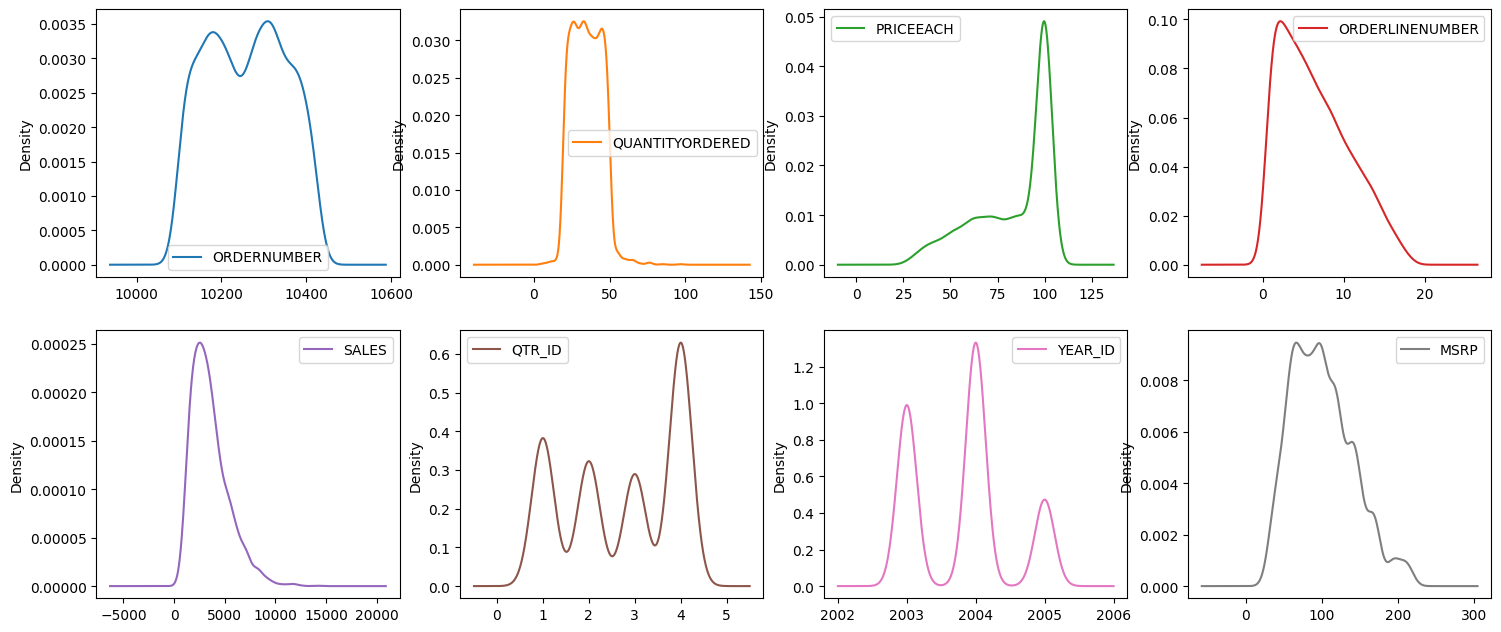

In [33]:
plt.rcParams['figure.figsize'] = [18, 16]
df2.plot(kind="density", subplots=True, layout=(4,4), sharex=False, sharey=False)
plt.show()

Majority of the orders come from 2003 and 2004 years (YEAR_ID). According to the data, most of the sales are within a certain price range of $5000.
We have skewed variables like "PRICEEACH" and "ORDERLINENUMBER". We also have variables with a large discrepancy such as "PRICEEACH", "ORDERLINENUMBER", and "MSRP".

In [34]:
df2['STATUS'].value_counts()

Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: STATUS, dtype: int64

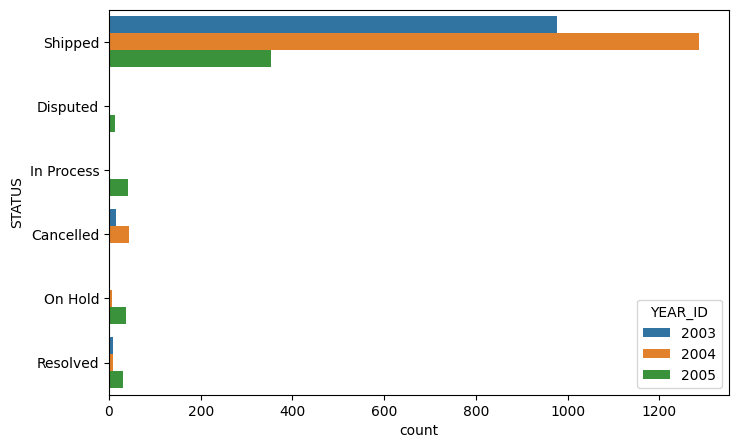

In [36]:
# Distribution of Sales Status
plt.rcParams['figure.figsize'] = [8, 5]
sns.countplot(y='STATUS',data=df2,hue='YEAR_ID', );

In [38]:
df2.groupby(['YEAR_ID'])['SALES'].sum()

YEAR_ID
2003    3516979.54
2004    4724162.60
2005    1791486.71
Name: SALES, dtype: float64

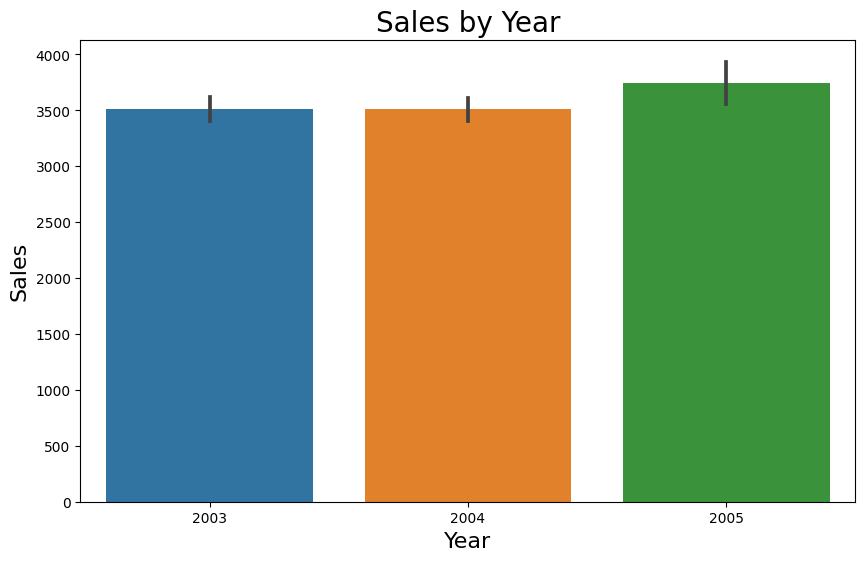

In [51]:
# Sales by Year

plt.figure(figsize=(10, 6))
plt.title('Sales by Year', fontsize=20)
sns.barplot(x='YEAR_ID', y='SALES', data=df)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.show()

The most sales were recorded in 2004 compared to 2003.

In [53]:
# Quarterly Sales by Year
sales = df2.groupby(['YEAR_ID', 'QTR_ID']).agg({'SALES': 'sum'}).reset_index()
sales

,YEAR_ID,QTR_ID,SALES
0,2003,1,445094.69
1,2003,2,562365.22
2,2003,3,649514.54
3,2003,4,1860005.09
4,2004,1,833730.68
5,2004,2,766260.73
6,2004,3,1109396.27
7,2004,4,2014774.92
8,2005,1,1071992.36
9,2005,2,719494.35


<Figure size 1200x800 with 0 Axes>

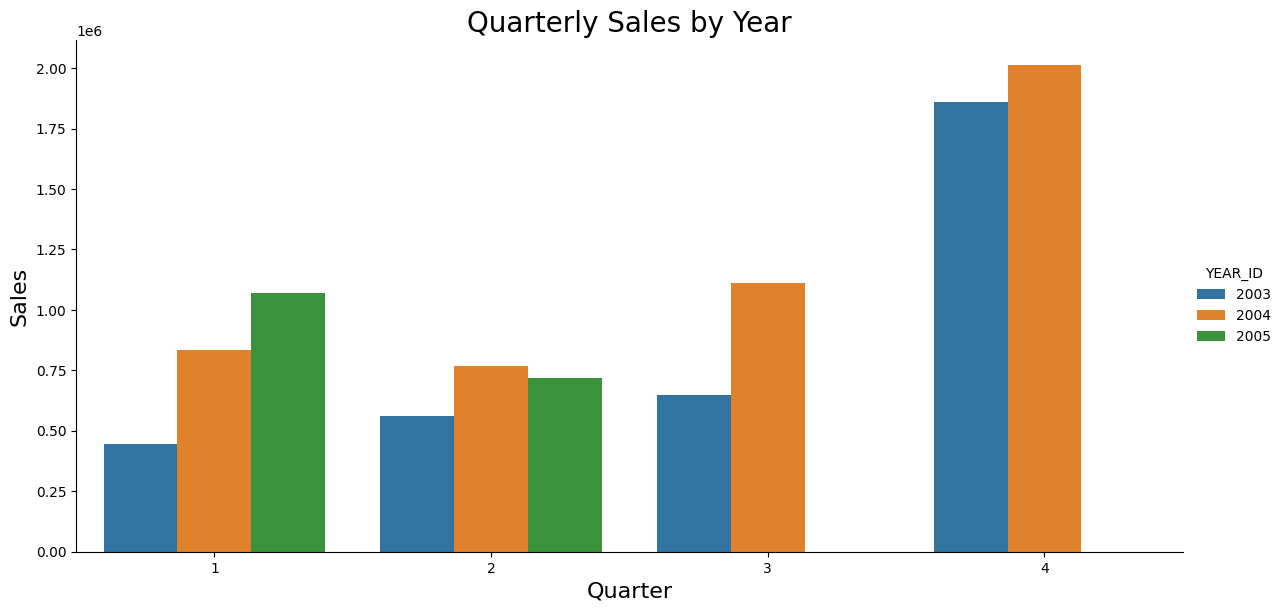

In [56]:
plt.figure(figsize=(12, 8))
sns.catplot(x='QTR_ID', y='SALES', hue='YEAR_ID', data=sales, kind='bar', height=6, aspect=2)

plt.title('Quarterly Sales by Year', fontsize=20)
plt.xlabel('Quarter', fontsize=16)
plt.ylabel('Sales', fontsize=16)

plt.show()

### RFM Analysis
For RFM analysis, we will be using only four columns: 'CUSTOMERNAME', 'ORDERNUMBER', 'ORDERDATE' and 'SALES'.

In [57]:
col = ['CUSTOMERNAME', 'ORDERNUMBER', 'ORDERDATE', 'SALES']
RFM = df2[col]
RFM.head()

,CUSTOMERNAME,ORDERNUMBER,ORDERDATE,SALES
0,Land of Toys Inc.,10107,2/24/2003 0:00,2871.00
1,Reims Collectables,10121,5/7/2003 0:00,2765.90
2,Lyon Souveniers,10134,7/1/2003 0:00,3884.34
3,Toys4GrownUps.com,10145,8/25/2003 0:00,3746.70
4,Corporate Gift Ideas Co.,10159,10/10/2003 0:00,5205.27


In [58]:
RFM.shape

(2823, 4)

In RFM clustering, it is usually assumed that only operations from the last 12 months are taken into account. The reason for this is simple: older operations can say little about the current situation of the seller, buyer, and the product itself. In order to set them, you need to adopt an agreed date for the grouping. In our data for "today" I will assume the day of the newest operation in the set.

In [59]:
RFM['ORDERDATE'] = pd.to_datetime(RFM['ORDERDATE'], errors='coerce')

/var/folders/fq/8t9cyhs53ql809q23q2w62wh0000gn/T/ipykernel_58585/493735993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM['ORDERDATE'] = pd.to_datetime(RFM['ORDERDATE'], errors='coerce')


In [60]:
RFM.head()

,CUSTOMERNAME,ORDERNUMBER,ORDERDATE,SALES
0,Land of Toys Inc.,10107,2003-02-24,2871.00
1,Reims Collectables,10121,2003-05-07,2765.90
2,Lyon Souveniers,10134,2003-07-01,3884.34
3,Toys4GrownUps.com,10145,2003-08-25,3746.70
4,Corporate Gift Ideas Co.,10159,2003-10-10,5205.27


In [61]:
RFM['ORDERDATE'].max()

Timestamp('2005-05-31 00:00:00')

In [62]:
now = dt.datetime(2005,5,31)

#### Creating the RFM table
Calculation of the "Recency" variable - information about how long ago the customer was shopping in the store:

In [63]:
rfm_df = RFM.groupby('CUSTOMERNAME').agg({'ORDERDATE': lambda x: (now - x.max()).days}) 

In [64]:
rfm_df['Frequency'] = RFM.groupby(by=['CUSTOMERNAME'])['ORDERNUMBER'].count()

In [65]:
rfm_df['MonetaryValue'] = RFM.groupby(by='CUSTOMERNAME').agg({'SALES': 'sum'})

In [66]:
rfm_df.head()

,ORDERDATE,Frequency,MonetaryValue
CUSTOMERNAME,,,
"AV Stores, Co.",195,51,157807.81
Alpha Cognac,64,20,70488.44
Amica Models & Co.,264,26,94117.26
"Anna's Decorations, Ltd",83,46,153996.13
Atelier graphique,187,7,24179.96


In [67]:
rfm_df.rename(columns={'ORDERDATE': 'Recency'}, inplace=True)
rfm_df.head()

,Recency,Frequency,MonetaryValue
CUSTOMERNAME,,,
"AV Stores, Co.",195,51,157807.81
Alpha Cognac,64,20,70488.44
Amica Models & Co.,264,26,94117.26
"Anna's Decorations, Ltd",83,46,153996.13
Atelier graphique,187,7,24179.96


### Model: RFM scoring + K-Means clustering
In this approach we use RFM scoring (assigned RFM score) and K-means clustering.

Transformation of all three variables:
The RFM method requires ordinal variables and this can be done in several ways, we will use the percentiles of the distribution of the given variable. Scaling is not required.

The labels will be values 1-4. When labeling the values of variables, it is important to remember that the higher label should mean the better situation of the person from the point of view of the seller. In the case of "Recency" - the smaller value of the variable, the higher label (we prefer clients who are active). In the case of "Frequency" - the greater value of the variable, the higher label (we prefer customers who buy more often and for large amounts).

In [68]:
r = pd.qcut(rfm_df.Recency, 4, labels = list(range(0,4)))

In [69]:
f = pd.qcut(rfm_df.Frequency, 4, labels = list(range(0,4)))

In [70]:
m = pd.qcut(rfm_df.MonetaryValue, 4, labels = list(range(0,4)))

In [71]:
rfm_df_cutted = pd.DataFrame({'Recency' : r, 'Frequency' : f, 'MonetaryValue' : m})
rfm_df_cutted

,Recency,Frequency,MonetaryValue
CUSTOMERNAME,,,
"AV Stores, Co.",2,3,3
Alpha Cognac,0,1,1
Amica Models & Co.,3,1,2
"Anna's Decorations, Ltd",1,3,3
Atelier graphique,2,0,0
...,...,...,...
"Vida Sport, Ltd",3,2,2
Vitachrome Inc.,2,1,2
"Volvo Model Replicas, Co",2,0,1


In [72]:
rfm_df_raw = rfm_df_cutted.values

### K-Means clustering model
K-means is an unsupervised machine learning algorithm, which is used for data clustering. In K-Means, algorithm number of clusters K is predetermined and the algorithm iteratively assigns each data point to one of the K clusters based on the feature similarity.

We will find the optimal number of clusters using the elbow method:

In [73]:
group = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(rfm_df_raw)
    group.append([i, kmeans.inertia_])
groups = pd.DataFrame(group, columns = ['number_of_group', 'inertia'])

groups

,number_of_group,inertia
0,1,344.304348
1,2,159.730326
2,3,107.023375
3,4,76.643737
4,5,60.647687
5,6,47.539915
6,7,38.642693
7,8,32.101754
8,9,27.426515
9,10,24.474747


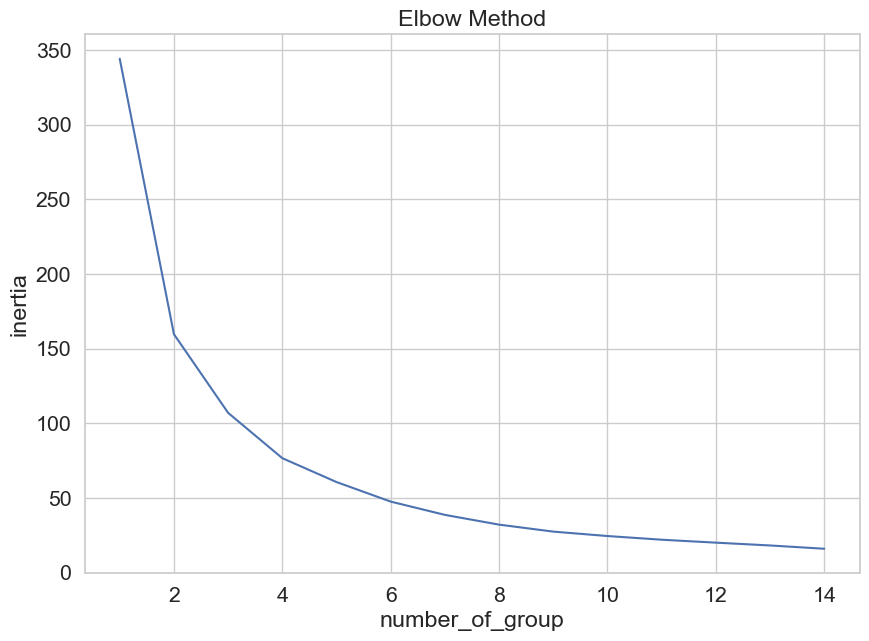

In [74]:
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4, style="whitegrid")
sns.lineplot(data = groups, x = 'number_of_group', y = 'inertia').set(title = "Elbow Method")
plt.show()

Based on the Elbow plot, we could choose 4 and 6. We will test both of them.

The function of visualize grouping:

In [75]:
def plots_model():    
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    for x in rfm_df.groups.unique():        
        xs = rfm_df[rfm_df.groups == x]['Recency']
        zs = rfm_df[rfm_df.groups == x]['Frequency']
        ys = rfm_df[rfm_df.groups == x]['MonetaryValue']
        ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w', label = x)

    ax.set_xlabel('Recency')
    ax.set_zlabel('Frequency')
    ax.set_ylabel('MonetaryValue')
    plt.title('Visualization of created groups')
    plt.legend()
    plt.show()

#### First model - 6 groups

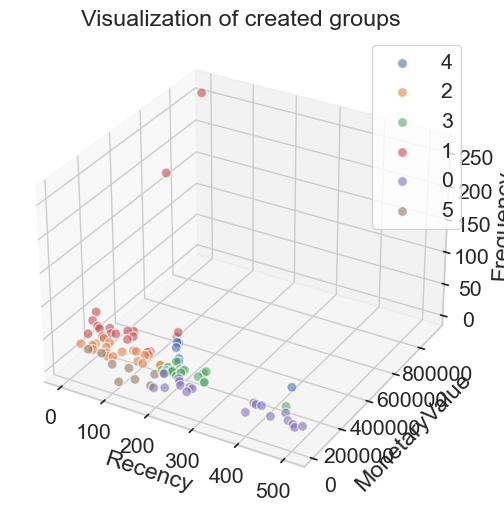

In [77]:
model_1 = KMeans(n_clusters=6, init='k-means++', max_iter=300)
groups = model_1.fit_predict(rfm_df_raw)
rfm_df_cutted['groups'] = groups
rfm_df['groups'] = groups

plots_model()

In [78]:
# Distribution of the size of individual groups
print((rfm_df.groups.value_counts(normalize = True, sort = True) * 100).to_string())

3    22.826087
2    20.652174
1    20.652174
0    20.652174
5     8.695652
4     6.521739


In [79]:
# Statistics for the whole set.
rfm_df.agg(['mean'])

,Recency,Frequency,MonetaryValue,groups
mean,181.826087,30.684783,109050.313587,2.0


In [80]:
# Statistics for individual groups.
rfm_df.groupby('groups').agg(['mean'])

,Recency,Frequency,MonetaryValue
,mean,mean,mean
groups,,,
0,343.578947,15.157895,53855.717895
1,65.157895,60.052632,216240.730526
2,87.736842,26.263158,92602.522105
3,235.714286,25.238095,90630.215238
4,244.333333,42.500000,142501.300000
5,109.875000,13.750000,47888.261250


<AxesSubplot: title={'center': 'The sum of the values of individual groups '}>

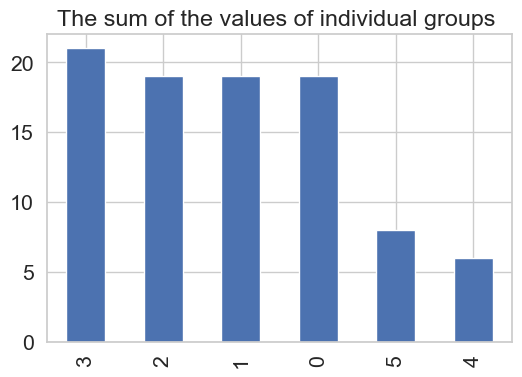

In [81]:
# Sum of values in each group
rfm_df.groups.value_counts().plot(kind='bar', figsize=(6,4), title='The sum of the values of individual groups ')

#### Second model - 4 groups

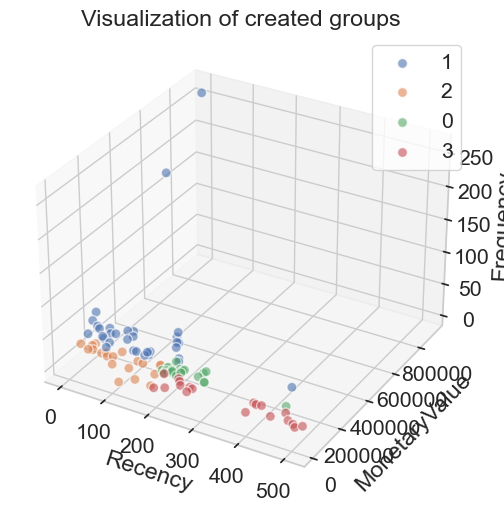

In [82]:
model_1 = KMeans(n_clusters=4, init='k-means++', max_iter=300)
groups = model_1.fit_predict(rfm_df_raw)
rfm_df['groups'] = groups

plots_model()

In [83]:
print((rfm_df.groups.value_counts(normalize = True, sort = True) * 100).to_string())

1    34.782609
0    22.826087
2    21.739130
3    20.652174


In [84]:
# Statistics for the whole set
rfm_df.agg(['mean'])

,Recency,Frequency,MonetaryValue,groups
mean,181.826087,30.684783,109050.313587,1.402174


In [85]:
# Distribution of the size of individual groups
rfm_df.groupby('groups').agg(['mean'])

,Recency,Frequency,MonetaryValue
,mean,mean,mean
groups,,,
0,235.714286,25.238095,90630.215238
1,105.156250,50.187500,179045.850625
2,94.250000,19.950000,68833.423500
3,343.578947,15.157895,53855.717895


<AxesSubplot: title={'center': 'The sum of the values of individual groups'}>

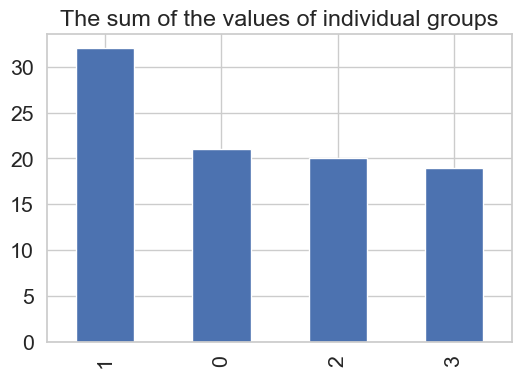

In [88]:
# Sum of values in each group
rfm_df.groups.value_counts().plot(kind='bar', figsize=(6,4), title='The sum of the values of individual groups')

In [87]:
rfm_df.head()

,Recency,Frequency,MonetaryValue,groups
CUSTOMERNAME,,,,
"AV Stores, Co.",195,51,157807.81,1
Alpha Cognac,64,20,70488.44,2
Amica Models & Co.,264,26,94117.26,0
"Anna's Decorations, Ltd",83,46,153996.13,1
Atelier graphique,187,7,24179.96,3


In [89]:
# Function to assigned segment name to each value
def name(row):
    if row == 0:
        return 'departing'
    elif row == 1:
        return 'active'
    elif row == 2:
        return 'inactive'
    else:
        return 'new'

In [90]:
# adding column SegmentName to DataFrame
rfm_df['SegmentName'] = rfm_df['groups'].apply(name)

rfm_df.head()

,Recency,Frequency,MonetaryValue,groups,SegmentName
CUSTOMERNAME,,,,,
"AV Stores, Co.",195,51,157807.81,1,active
Alpha Cognac,64,20,70488.44,2,inactive
Amica Models & Co.,264,26,94117.26,0,departing
"Anna's Decorations, Ltd",83,46,153996.13,1,active
Atelier graphique,187,7,24179.96,3,new


## Interpretation of the results
**Interpretation of the resulting groups:**

We segmented our customers into four distinct groups, which we interpret as follows:

Group 0: Customers who were shopping for a long time, buy moderately often and they shop for high amounts.
Group 1: Customers who have been shopping recently, they buy often and make purchases for large amounts.
Group 2: Customers who have not been buying anything for a long time, they rarely buy and make purchases for relatively small amounts.
Group 3: Customers who have been shopping recently, they rarely buy and make purchases for relatively small amounts.

We can categorize these groups as:

Group 0 - former best customers - departing,
Group 1 - best customers - active,
Group 2 - old and random customers - inactive,
Group 3 - new and random customers - new.

**Marketing strategies for the Customer Segments:**

Based on the four clusters, we can tailor marketing strategies relevant to each group:

For Groups 1 and 3, a typical promotional strategy would focus on efforts targeted at high-value customers. For instance, special offers with discounts, customer loyalty cards offering benefits (e.g., points for rewards redemption), or a gift with their next purchase could be effective.

As for new clients (Group 3), who have not previously purchased from our store, it is worth exerting efforts to convert them into best clients. Strategies may include email marketing showcasing product advantages, offering special discounts for sufficiently large purchases, or introductory offers.

For Groups 0 and 2, comprising former best customers and old clients, respectively, specific marketing strategies can also be employed. Group 0, consisting of former best clients, includes significant customers who have ceased purchasing our products. Therefore, rekindling relations with them through targeted marketing campaigns would be valuable. Regarding Group 2, consisting of old and random customers, it is worth considering whether marketing activities are warranted.